# Exploratory Data Analysis and Visualization

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import json
import statistics
import math

from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# !pip install ipynb

---

# Exploring `anime.csv` dataset [2000 to 2021 animes]




In [3]:
anime_df = pd.read_csv('dataset/anime_cleaned.csv')
print("Number of animes:", len(anime_df))
anime_df.head()

Number of animes: 8777


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,...,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,...,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0,0.8987,0.1013
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,...,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0,0.9479,0.0521
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,...,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0,0.7589,0.2411
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,...,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0,0.7816,0.2184
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,...,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0,0.9915,0.0085


### Features available to explore:

In [4]:
print("Features:")
print("---------")

for header in anime_df.columns:
    print(header)

Features:
---------
id
title
start_date
end_date
synopsis
mean
rank
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
average_episode_duration
rating
studios
start_season_year
start_season_season
broadcast_day_of_the_week
broadcast_start_time
statistics_watching
statistics_completed
statistics_on_hold
statistics_dropped
statistics_plan_to_watch
statistics_num_list_users
positive_viewership_fraction
negative_viewership_fraction


### Convert `studios` and `genres` features to json for exploration:

In [5]:
from ipynb.fs.full.data_cleaning_preprocessing import json_studios, json_genres
print("json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb")

Missing values in dataframe:
id                             0
title                          0
main_picture                   0
start_date                     0
end_date                     876
synopsis                     128
mean                         116
rank                           0
popularity                     0
num_list_users                 0
num_scoring_users              0
nsfw                           0
created_at                     0
updated_at                     0
media_type                     0
status                         0
genres                         8
num_episodes                   0
start_season                   0
broadcast                   5372
source                       901
average_episode_duration       0
rating                        61
background                  7067
studios                        0
statistics                     0
dtype: int64
data shape:  (8777, 26)


c:\Programming Projects (Not Synced)\dsai\SC1015-Project\Anime\data_cleaning_preprocessing.ipynb:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    <tr>\n",
c:\Programming Projects (Not Synced)\dsai\SC1015-Project\Anime\data_cleaning_preprocessing.ipynb:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "      <th>0</th>\n",
C:\Users\tohji\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Number of rows before: 8777
Number of rows left: 8769
Number of rows before removing 'Award Winning': 31929
Number of rows after removing 'Award Winning': 31926
Number of unique genres: 40
json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb


In [6]:
# convert to json
anime_df = json_studios(anime_df)
anime_df = json_genres(anime_df)

## 1. Explore `genres` feature

In [7]:
from collections import defaultdict

In [8]:
genres_dict = defaultdict(int)

# getting the genres count from 2000 to 2021
for anime in anime_df['genres']:
    for genre in anime:
        genres_dict[genre['name']] += 1
               
# printing out the genre counts
for genre, count in genres_dict.items():
    print(f'{genre}: {count}')

Action: 2744
Adventure: 2278
Drama: 1620
Mecha: 623
Military: 381
Romance: 1125
Sci-Fi: 1458
Space: 230
Comedy: 4571
Fantasy: 2311
Kids: 1253
Shounen: 2036
Super Power: 606
Police: 236
Slice of Life: 1377
School: 1197
Shoujo: 637
Ecchi: 334
Seinen: 626
Mystery: 642
Demons: 351
Horror: 191
Supernatural: 1075
Psychological: 255
Parody: 339
Cars: 69
Historical: 583
Martial Arts: 295
Samurai: 128
Avant Garde: 74
Vampire: 93
Suspense: 118
Music: 821
Game: 377
Harem: 157
Gourmet: 100
Sports: 465
Boys Love: 41
Girls Love: 39
Award Winning: 3
no_genre: 8
Josei: 70


### 1.1 Plot genre counts

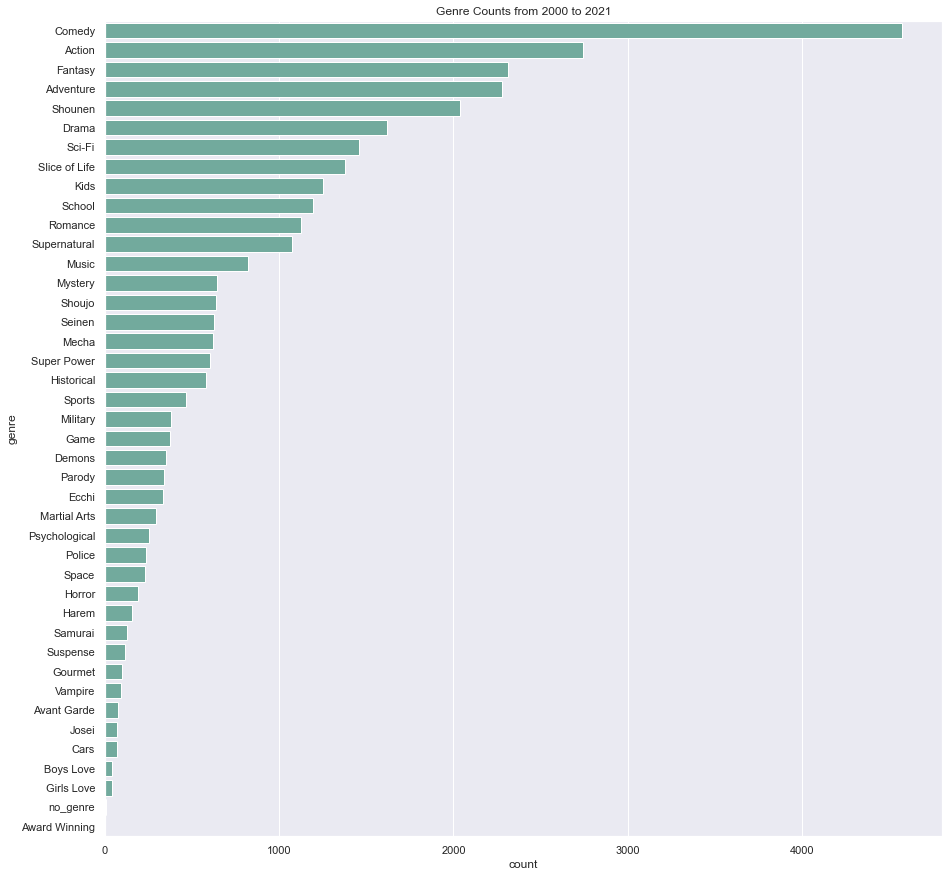

In [9]:
# Plot Genre Counts

# convert dict to dataframe
genre_df = pd.DataFrame(genres_dict.items())

# rename column names
genre_df.rename(columns={0: 'genre', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
genre_df = genre_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 15))

# Make a barplot
sb.barplot(
    x="count", 
    y="genre", 
    data=genre_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Genre Counts from 2000 to 2021");

- It can be seen that `Comedy` is the genres that most anime have
- The top 5 genres commonly seen  are `Comedy`,  `Action`, `Fantasy`, `Adventure`, and `Shounen`

**Analysis:**
- It seems that animes are generally produced to produce some sort of commedic effect, with a sense of fantasy and adventure filled with action packed scenes.
- Thus, it appears that animes are shows that allow people to have a fun time escaping into another world

---

## 1.2 Let's explore those with no genres:

In [10]:
no_genre_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    if anime_df['genres'][row][0]['name'] == 'no_genre':
        no_genre_df = no_genre_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with no genres:', len(no_genre_df))

no_genre_df

-> Number of animes with no genres: 8


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,22239,Mahou no Yousei Persia Pilot,2003-05-23,2003-05-23,Unaired pilot special of Mahou no Yousei Persi...,5.59,10328,13823,417,120,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,184,pg,"[{'id': 1, 'name': 'Studio Pierrot'}]",2003.0,spring,NIL,NIL,14.0,196.0,9.0,40.0,157.0,416.0,0.8822,0.1178
1,6199,Mai-Otome Zwei Special,2008-03-04,2008-03-04,Ribbon-chan wants to become an Otome.\r\n\r\n(...,6.64,5472,8329,3369,1297,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,271,g,"[{'id': 14, 'name': 'Sunrise'}]",2008.0,winter,NIL,NIL,68.0,2075.0,59.0,57.0,1107.0,3366.0,0.9655,0.0345
2,3805,Kaitou Tenshi Twin Angel,2008-08-08,2008-10-02,Haruka Minazuki and Aoi Kannazuki are freshman...,6.02,8649,6888,5649,1881,white,ova,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",2,game,1800,pg_13,"[{'id': 70, 'name': 'Nomad'}]",2008.0,summer,NIL,NIL,225.0,2492.0,138.0,163.0,2630.0,5648.0,0.9467,0.0533
3,6368,Legend of Regios,2009-03-27,2009-05-29,Legend of Regios was originally the English sp...,6.42,6641,5497,9856,2585,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",3,unknown,506,r,"[{'id': 218, 'name': 'Zexcs'}]",2009.0,winter,NIL,NIL,342.0,4056.0,199.0,193.0,5068.0,9858.0,0.9602,0.0398
4,32644,Yaseruyagi,2010-03-28,2010-03-28,"A story about granny, her granddaughter and a ...",5.3,11193,14629,332,159,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,37,g,[],2010.0,winter,NIL,NIL,9.0,227.0,0.0,34.0,62.0,332.0,0.8976,0.1024
5,10710,Houkago no Pleiades: Manner Movie,2011-06-04,2011-06-04,A manner movie based on the Houkago no Pleiade...,5.35,11046,9257,2349,698,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,90,pg_13,"[{'id': 6, 'name': 'Gainax'}]",2011.0,spring,NIL,NIL,53.0,1077.0,40.0,63.0,1118.0,2351.0,0.9562,0.0438
6,32695,Match Shoujo,2016-02-10,2016-02-10,An animated commercial produced by studio NAZ ...,5.73,9833,11695,899,309,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,manga,71,pg,"[{'id': 951, 'name': 'NAZ'}]",2016.0,winter,NIL,NIL,46.0,509.0,9.0,30.0,312.0,906.0,0.957,0.043
7,38341,Bai Niao,2017-06-13,2017-06-13,"After her mother's death, young kazakh girl Ah...",5.88,9244,13388,484,155,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,unknown,839,g,[],2017.0,spring,NIL,NIL,18.0,208.0,8.0,28.0,226.0,488.0,0.9262,0.0738


In [11]:
# average number of episodes
print('Average number of episodes for animes:', round(anime_df['num_episodes'].mean(), 1))
print('----- \n')

print('Animes with no genres: \n')
# number of episodes for animes with no genres
for anime in range(0, len(no_genre_df)):
    print(f'{no_genre_df["title"][anime]} has {no_genre_df["num_episodes"][anime]} episodes!')
print("")

# average number of episodes for animes with no genres
print('Average number of episodes: ', round(no_genre_df['num_episodes'].mean(), 1))

Average number of episodes for animes: 45.1
----- 

Animes with no genres: 

Mahou no Yousei Persia Pilot has 1 episodes!
Mai-Otome Zwei Special has 1 episodes!
Kaitou Tenshi Twin Angel has 2 episodes!
Legend of Regios has 3 episodes!
Yaseruyagi has 1 episodes!
Houkago no Pleiades: Manner Movie has 1 episodes!
Match Shoujo has 1 episodes!
Bai Niao has 1 episodes!

Average number of episodes:  1.4


In [12]:
print(no_genre_df['broadcast_day_of_the_week'])
print(no_genre_df['broadcast_start_time'])

0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_day_of_the_week, dtype: object
0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_start_time, dtype: object


**Analysis:**
- It appears that animes with no genres have very low episode count, and are not broadcasted
- This might imply that people rating animes did not have sufficient information to make a proper judgement on the genre of these animes
- These can be considered an `anomaly` since only 8 animes from 2000-2021 do not have any genres

---

## 1.3 Let's explore those with `Award Winning` genre:

In [13]:
award_winning_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    for genre in anime_df['genres'][row]:
        if genre['name'] == 'Award Winning':
            award_winning_df = award_winning_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with "Award Winning" genre:', len(award_winning_df))

award_winning_df

-> Number of animes with "Award Winning" genre: 3


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,199,Sen to Chihiro no Kamikakushi,2001-07-20,2001-07-20,"Stubborn, spoiled, and naïve, 10-year-old Chih...",8.79,32,43,1566400,1096313,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 46, 'n...",1,original,7475,pg,"[{'id': 21, 'name': 'Studio Ghibli'}]",2001.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,1773.0,128401.0,1570198.0,0.9964,0.0036
1,5365,Tsumiki no Ie,2008-06-10,2008-06-10,In a flooded town where the waters are ever-ri...,8.04,502,1855,87239,49407,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 8...",1,original,723,g,"[{'id': 234, 'name': 'Oh! Production'}]",2008.0,spring,NIL,NIL,1127.0,61611.0,457.0,288.0,23844.0,87327.0,0.9915,0.0085
2,50206,Takano Kousaten,2021-09-17,2021-09-17,"In a certain city, for just a moment in time, ...",6.85,4463,12447,686,369,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 3...",1,original,390,pg_13,[],2021.0,summer,NIL,NIL,31.0,506.0,2.0,10.0,161.0,710.0,0.9831,0.0169


In [14]:
award_winning_df.describe()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
count,3,3,3,3,3,3.00,3,3,3,3,3,3,3,3,3,3,3,3,3,3.0,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0000,3.0000
unique,3,3,3,3,3,3.00,3,3,3,3,1,1,1,3,1,1,3,3,3,3.0,2,1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0000,3.0000
top,199,Sen to Chihiro no Kamikakushi,2001-07-20,2001-07-20,"Stubborn, spoiled, and naïve, 10-year-old Chih...",8.79,32,43,1566400,1096313,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 46, 'n...",1,original,7475,pg,"[{'id': 21, 'name': 'Studio Ghibli'}]",2001.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,1773.0,128401.0,1570198.0,0.9964,0.0036
freq,1,1,1,1,1,1.00,1,1,1,1,3,3,3,1,3,3,1,1,1,1.0,2,3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000


**Analysis:**
- From this one, can see that all 3 of the `Award Winning` genre animes have the same `nsfw`, `media_type`, `num_episodes`, `source`, `broadcast_day_of_the_week` and `broadcast_start_time` as seen from the unique count from .describe()
- All 3 are movies with 1 episode, have original source, not broadcasted on TV and has white nsfw

---

## 1.4 Compare `Award Winning` with `no_genre`:


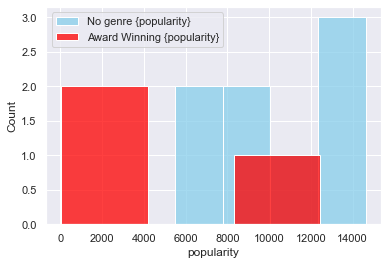

In [15]:
# compare popularity

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="popularity", color="skyblue", label="No genre {popularity}", kde=False)
sb.histplot(data=award_winning_df, x="popularity", color="red", label="Award Winning {popularity}", kde=False)

plt.legend() 
plt.show()

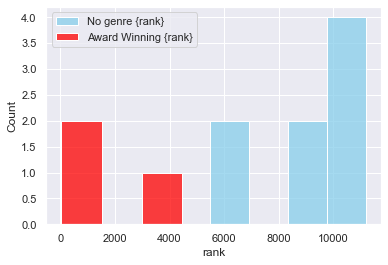

In [16]:
# compare rank

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="rank", color="skyblue", label="No genre {rank}", kde=False)
sb.histplot(data=award_winning_df, x="rank", color="red", label="Award Winning {rank}", kde=False)

plt.legend() 
plt.show()

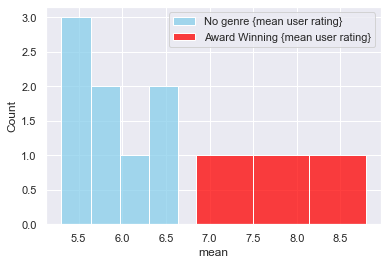

In [17]:
# compare mean user rating: {mean}

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="mean", color="skyblue", label="No genre {mean user rating}", kde=False)
sb.histplot(data=award_winning_df, x="mean", color="red", label="Award Winning {mean user rating}", kde=False)

plt.legend() 
plt.show()

**Analysis:**
- `Award Winning` animes on generally have higher popularity, have better rankings, and are rated higher for all the animes than that of `no_genre` animes
- It seems like what differentiate these 2 categories is that `Award Winning` animes are more popular and higher ranked such that `Award Winning` animes have genres associated with them whereas `no_genre` animes do not.

**Next Step:**
- Let's look at the various `statistics` to compare the viewership statistics:
  - statistics_watching
  - statistics_completed
  - statistics_on_hold
  - statistics_dropped
  - statistics_plan_to_watch
  - **statistics_num_list_users** (equal to sum of the previous statistics)
  
- We shall split the statistics into 2 groups to group the **positive/negative sentiment of the viewership statistics**:
  1. `Positive`
    - statistics_watching + statistics_completed + statistics_plan_to_watch
  2. `Negative`
    - statistics_on_hold + statistics_dropped

In [18]:
# compare statistics_num_list_users
no_genre_total_views = no_genre_df['statistics_num_list_users'].mean()
award_winning_total_views = award_winning_df['statistics_num_list_users'].mean()

print('[Comparing statistics_num_list_users (Average number of viewers)]')
print('-----')
print("'no_genre':      \t", no_genre_total_views)
print("'Award Winning': \t", award_winning_total_views)

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_total_views/no_genre_total_views)*100, 2)}% more views than 'no_genre'")

[Comparing statistics_num_list_users (Average number of viewers)]
-----
'no_genre':      	 2920.625
'Award Winning': 	 552745.0
-----
Percentage greater (using mean values):
'Award Winning' has 18925.57% more views than 'no_genre'


In [19]:
positive_viewership = [
    'statistics_watching',
    'statistics_completed',
    'statistics_plan_to_watch'
]

negative_viewership = [
    'statistics_on_hold',
    'statistics_dropped'
]

# sum row then take mean for all animes
def get_pos_neg_views(df, viewership_types_list):
    total_views = []
    for anime in range(0, len(df)):
        single_view = 0

        for viewership_type in viewership_types_list:
            single_view += df[viewership_type][anime]

        # add this anime single_positive_view to list
        total_views.append(single_view)
        
    return total_views

In [20]:
# compare positive viewership statistics
no_genre_pos_views = round(statistics.mean(get_pos_neg_views(no_genre_df, positive_viewership)), 2)
award_winning_pos_views = round(statistics.mean(get_pos_neg_views(award_winning_df, positive_viewership)), 2)

print('[Comparing positive viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_pos_views)
print("'Award Winning': \t", award_winning_pos_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_pos_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_pos_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_pos_views/no_genre_pos_views)*100, 2)}% more positive views than 'no_genre'")

[Comparing positive viewership statistics]
-----
Mean:
'no_genre':      	 2786.88
'Award Winning': 	 550592.33
-----
Percentage of total views (using mean values):
'no_genre':      	 95.42%
'Award Winning': 	 99.61%
-----
Percentage greater (using mean values):
'Award Winning' has 19756.59% more positive views than 'no_genre'


In [21]:
# compare negative viewership statistics
no_genre_neg_views = round(statistics.mean(get_pos_neg_views(no_genre_df, negative_viewership)), 2)
award_winning_neg_views = round(statistics.mean(get_pos_neg_views(award_winning_df, negative_viewership)), 2)

print('[Comparing negative viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_neg_views)
print("'Award Winning': \t", award_winning_neg_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_neg_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_neg_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_neg_views/no_genre_neg_views)*100, 2)}% more negative views than 'no_genre'")

[Comparing negative viewership statistics]
-----
Mean:
'no_genre':      	 133.75
'Award Winning': 	 2152.67
-----
Percentage of total views (using mean values):
'no_genre':      	 4.58%
'Award Winning': 	 0.39%
-----
Percentage greater (using mean values):
'Award Winning' has 1609.47% more negative views than 'no_genre'


**Analysis:**
- It appears that `Award Winning` animes have more views than `no_genre` by a large amount on average
  - **18925.57% more**
- Additionally, the percentage of positive views is greater for `Award Winning` animes than that of `no_genre` animes
  - **0.39% vs 4.58%**
- Furthermore, the percentage of negative views is lower for `Award Winning` animes than that of `no_genre` animes
  - **99.61% vs 95.42%**
  
- Therefore, more people watch `Award Winning` animes and have positive experience with them compared to `no_genre` animes since the retention is greater for `Award Winning` animes.
- Thus, we can conclude that `Award Winning` animes are definitely more popular and viewed more. Hence, these animes have their associated genres

**Conclusion:**
- **Similarities**: number of episodes, broadcast details, status, and nsfw type
- We can conclude that the **differences** between `Award Winning` animes and `no_genre` animes include the popularity, rank, user ratings, and the viewership statistics. (Even though both type have similar number of episodes, broadcast details, status, and nsfw type

---

## 1.5 Exploring `genres` trend from 2000 to 2021
- We will use `start_season_year` and `genres` from the csv file we have prepared during the preprocessing and cleaning stage

In [22]:
# Import genres timeseries dataframe
genres_time_series_df = pd.read_csv('dataset/genres_timeseries_cleaned.csv')
genres_time_series_df.head()

,Start Season Year,Gourmet,Seinen,Sci-Fi,Martial Arts,Game,Girls Love,Psychological,Shounen,Boys Love,Slice of Life,Ecchi,Josei,Supernatural,Samurai,Police,Mecha,Romance,Fantasy,Drama,Demons,Horror,Kids,Comedy,Suspense,Military,Action,Avant Garde,Parody,Shoujo,School,Sports,Vampire,Super Power,Historical,Adventure,Music,Space,Harem,Mystery,Cars
0,1999.0,0,6,38,0,0,0,14,103,0,35,0,0,6,0,0,22,5,108,105,6,8,54,167,1,8,117,0,2,1,3,0,1,93,1,127,7,6,0,20,0
1,2000.0,1,6,76,4,26,0,9,88,2,12,6,0,50,6,5,37,41,97,61,32,27,77,172,0,8,106,15,11,22,14,10,11,4,36,144,14,12,2,18,10
2,2001.0,0,10,88,8,6,1,4,95,0,36,8,0,28,1,5,41,50,85,75,4,6,47,161,0,10,102,2,9,25,34,41,2,14,15,110,9,15,7,14,3
3,2002.0,2,20,127,25,21,0,11,111,2,51,16,0,40,4,15,54,79,101,91,8,6,42,234,0,22,157,3,8,32,40,23,0,31,14,149,17,19,6,27,4
4,2003.0,0,13,126,6,12,1,8,110,0,26,14,3,37,5,10,49,61,77,83,19,4,43,168,0,14,110,0,2,20,18,26,1,17,19,148,13,8,10,20,8


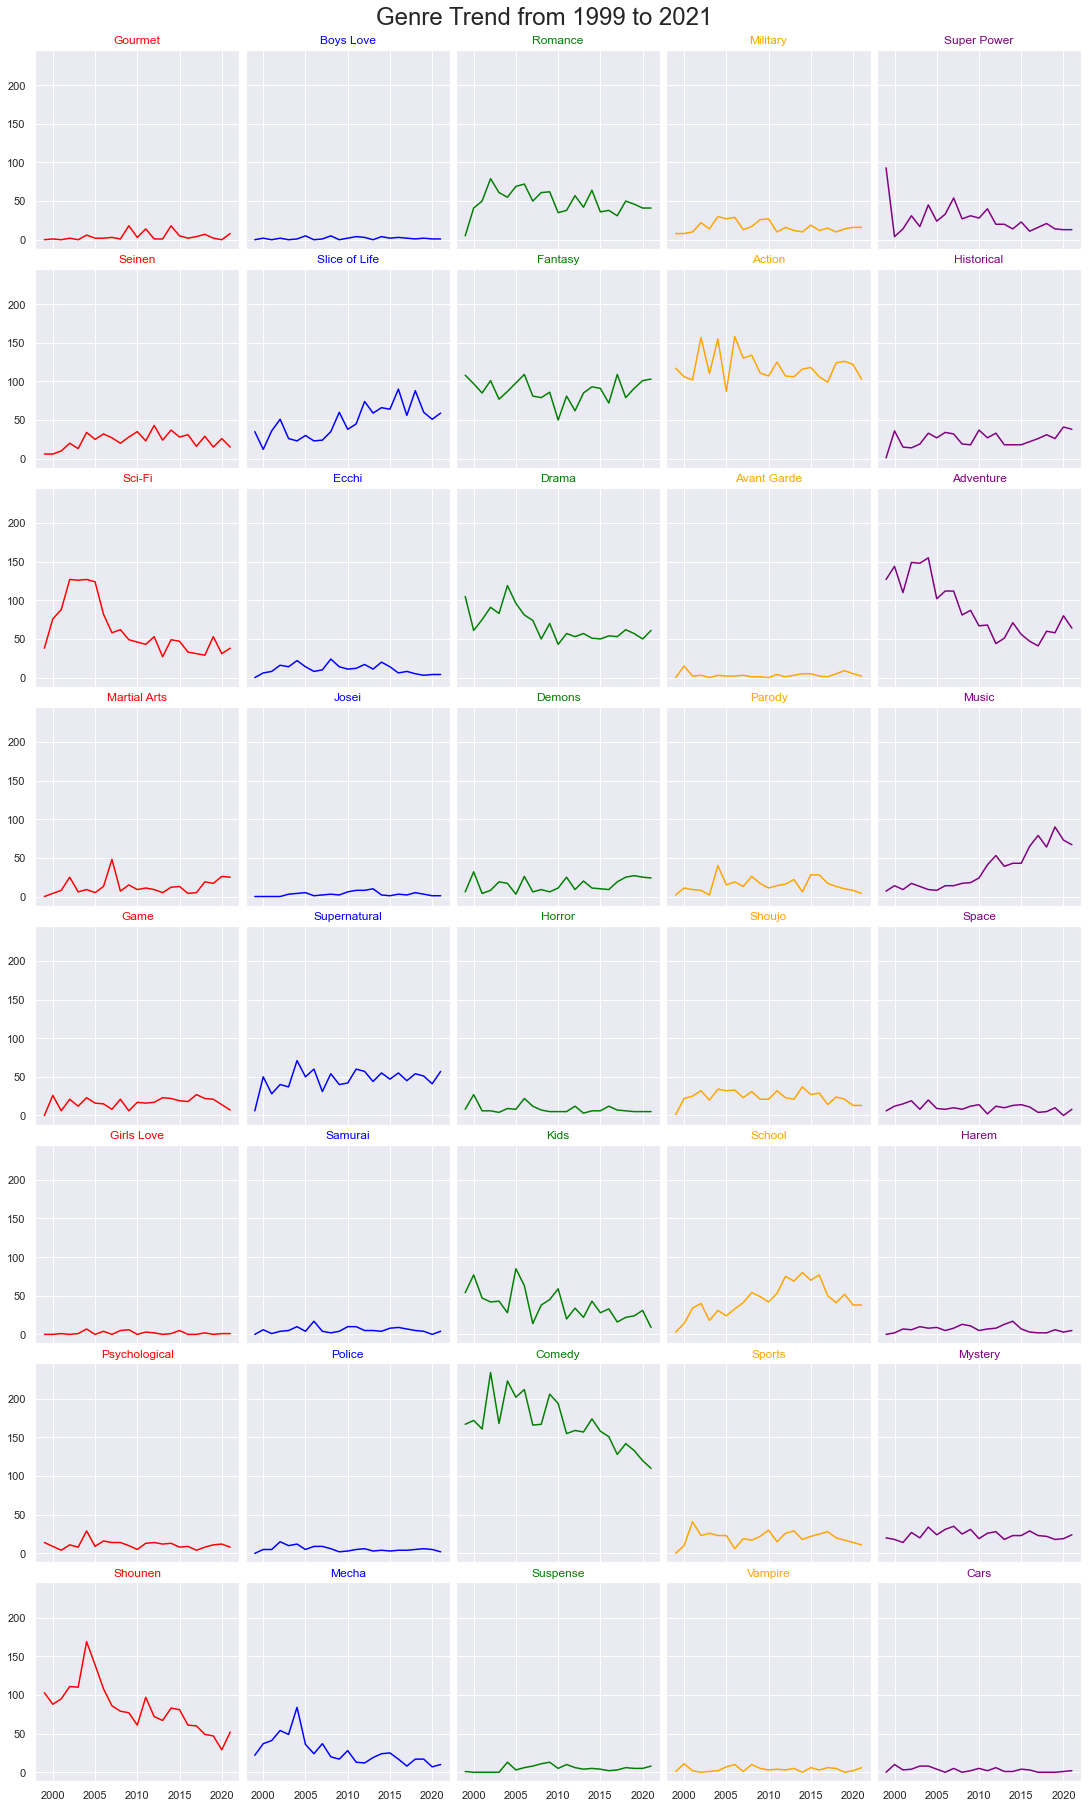

In [23]:
# use seaborn style
sb.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(8, 5, figsize=(15, 25), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Genre Trend from 1999 to 2021', fontsize=24)

x_index = 0
y_index = 0

genres_list = list(genres_time_series_df.columns)[1:]

for genre in genres_list:
    # plot line graph
    axs[x_index, y_index].plot('Start Season Year', genre, data=genres_time_series_df, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    
    # subplot ordering
    x_index += 1
    if x_index > 7:
        x_index -= 8
        y_index += 1
        

# show the graph
plt.show()

**Analysis:**
- **Decreasing Trend:**
  - Shounen, Comedy, Kids, Mecha, Sci-Fi, Adventure
- **Increasing Trend:**
  - Slice of Life, Music


- Surprising for `Shounen`, `Comedy`, and `Adventure` to have a decreasing trend since they are among the top 5 genres commonly seen
- `Slice of Life`, and `Music` could possibly become common animes in the future

---

# 2. Exploring 'studios'
- We will use `studios` from anime_df

In [24]:
studios_df = pd.DataFrame(anime_df['studios'])
studios_df.head()

,studios
0,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '..."
1,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na..."
2,"[{'id': 247, 'name': 'Shin-Ei Animation'}]"
3,"[{'id': 18, 'name': 'Toei Animation'}]"
4,"[{'id': 18, 'name': 'Toei Animation'}]"


In [25]:
# creating a dictionary to count the frequency of each producer
studios_dict = defaultdict(int)

# getting studio count
for row in range(len(studios_df)):
    for studio in studios_df['studios'][row]:
        studios_dict[studio['name']] += 1

# printing out the studio counts
for studio, count in studios_dict.items():
    print(f'{studio}: {count}')

Sunrise: 423
Nakamura Production: 1
Artland: 45
Magic Bus: 12
Shin-Ei Animation: 294
Toei Animation: 468
Gallop: 178
Nippon Animation: 191
Group TAC: 43
Ajia-Do: 106
Madhouse: 330
TMS Entertainment: 408
Studio Pierrot: 255
Yumeta Company: 23
Milky Cartoon: 12
APPP: 14
Studio Deen: 243
SBS TV Production: 9
PP Project: 2
dwarf: 34
AIC: 54
OLM: 306
Production Reed: 18
Xebec: 161
J.C.Staff: 236
Eiken: 96
Bee Train: 41
Studio Bogey: 6
Studio Hibari: 56
Trans Arts: 29
Actas: 53
Satelight: 110
Production I.G: 255
Gainax: 40
Plum: 6
E&G Films: 10
Tatsunoko Production: 98
Hal Film Maker: 39
Triangle Staff: 1
Bones: 136
Gonzo: 140
Studio Ghibli: 27
Studio Live: 3
Studio Flag: 5
Brain's Base: 80
Vega Entertainment: 10
Radix: 24
Shaft: 109
Phoenix Entertainment: 1
Triple X: 2
Polygon Pictures: 21
Tezuka Productions: 35
Pastel: 2
JCF: 2
M.S.C: 14
Tokyo Kids: 15
Daume: 22
Ashi Production: 3
Dongwoo A&E: 23
Zexcs: 40
Soeishinsha: 2
Studio Comet: 75
Creators Dot Com: 2
Studio 4°C: 39
Studio Kyuuma: 2


## Top 50 Studios

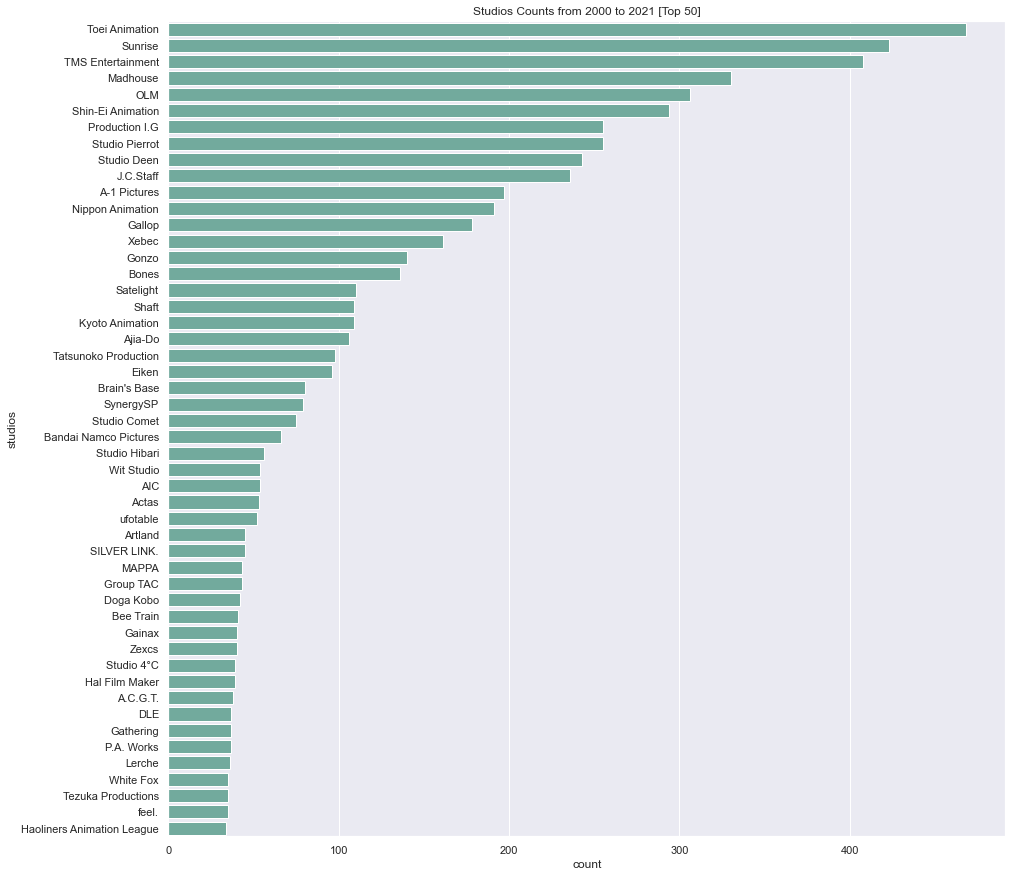

In [26]:
# Ploting Top 50 Studios Counts

# convert dict to dataframe
studios_df = pd.DataFrame(studios_dict.items())

# rename column names
studios_df.rename(columns={0: 'studios', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
studios_df = studios_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 15))

# Make a barplot
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(50), 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Studios Counts from 2000 to 2021 [Top 50]");

## Top 5 Studios

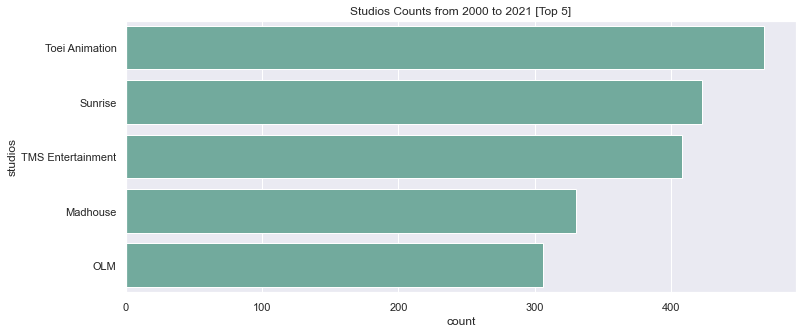

In [27]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Make a barplot
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(), 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Studios Counts from 2000 to 2021 [Top 5]");

**Analysis:**
- `Toei Animation` is the most common studio in this dataset, followed by `Sunrise`, `TMS Entertainment`, `Madhouse`, and `OLM`.

---

# 3. `mean` rating
## 3.1 Explore `mean` rating of '-1'


In [28]:
# animes with ratings
positive_mean_df = anime_df[anime_df['mean'] >= 0].reset_index(drop=True)

# animes with no ratings
negative_mean_df = anime_df[anime_df['mean'] == -1].reset_index(drop=True)
negative_mean_df.head()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,23799,Dango San Kyoudai Attoiuma Gekijou,1999-10,2004-03,The hit Danga San Kyoudai song was adapted int...,-1.0,15827,15990,234,44,white,tv,finished_airing,"[{'id': 15, 'name': 'Kids'}, {'id': 19, 'name'...",50,unknown,180,g,[],1999.0,fall,NIL,NIL,10.0,77.0,6.0,67.0,75.0,235.0,0.6894,0.3106
1,40078,Popolocrois Monogatari Pilot,2000-03-23,2000-03-23,A pilot for a proposed Popolocrois Monogatari ...,-1.0,13284,16048,231,62,white,special,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 10, 'n...",1,game,202,g,[],2000.0,winter,NIL,NIL,6.0,99.0,3.0,21.0,101.0,230.0,0.8957,0.1043
2,21975,Sore Ike! Anpanman: Outa to Teasobi Tanoshii ne,2000-03-20,2000-11-22,no_Synopsis,-1.0,13971,15679,256,53,white,ova,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 10, 'name...",2,unknown,2460,pg,[],2000.0,winter,NIL,NIL,12.0,100.0,4.0,63.0,78.0,257.0,0.7393,0.2607
3,29369,Tick & Tack,1998-08-02,2010-04-23,Tick & Tack are very good friends who get caug...,-1.0,14306,16549,199,33,white,tv,finished_airing,"[{'id': 10, 'name': 'Fantasy'}, {'id': 15, 'na...",18,unknown,300,pg,[],1998.0,summer,NIL,NIL,14.0,54.0,8.0,63.0,60.0,199.0,0.6432,0.3568
4,29367,Jam the Housnail,1996-06-10,2006-04-17,"Claymation series about a family of ""housnails...",-1.0,16779,15630,260,57,white,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 15, 'n...",15,original,305,g,[],1996.0,summer,NIL,NIL,18.0,93.0,7.0,51.0,91.0,260.0,0.7769,0.2231


#### Taking a look at the `num_scoring_users` for animes with/without ratings

In [29]:
print('Animes without ratings:')
print(negative_mean_df['num_scoring_users'].describe())

print("---\n\nAnimes with ratings:")
print(positive_mean_df['num_scoring_users'].describe())

Animes without ratings:
count    116.00000
mean      57.25000
std       24.54344
min        0.00000
25%       38.00000
50%       57.00000
75%       72.25000
max      120.00000
Name: num_scoring_users, dtype: float64
---

Animes with ratings:
count    8.661000e+03
mean     7.996089e+04
std      2.230889e+05
min      1.010000e+02
25%      7.940000e+02
50%      4.906000e+03
75%      4.194200e+04
max      2.329206e+06
Name: num_scoring_users, dtype: float64


In [30]:
# combine the 2 dataframes
num_scoring_users_df = pd.DataFrame(np.log10(negative_mean_df['num_scoring_users'])).rename(
    columns={'num_scoring_users': 'num_scoring_users_negative'})

num_scoring_users_df['num_scoring_users_positive'] = np.log10(positive_mean_df['num_scoring_users'])

num_scoring_users_df.head()

C:\Users\tohji\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,num_scoring_users_negative,num_scoring_users_positive
0,1.643453,4.125091
1,1.792392,3.811441
2,1.724276,4.377051
3,1.518514,6.008717
4,1.755875,4.639477


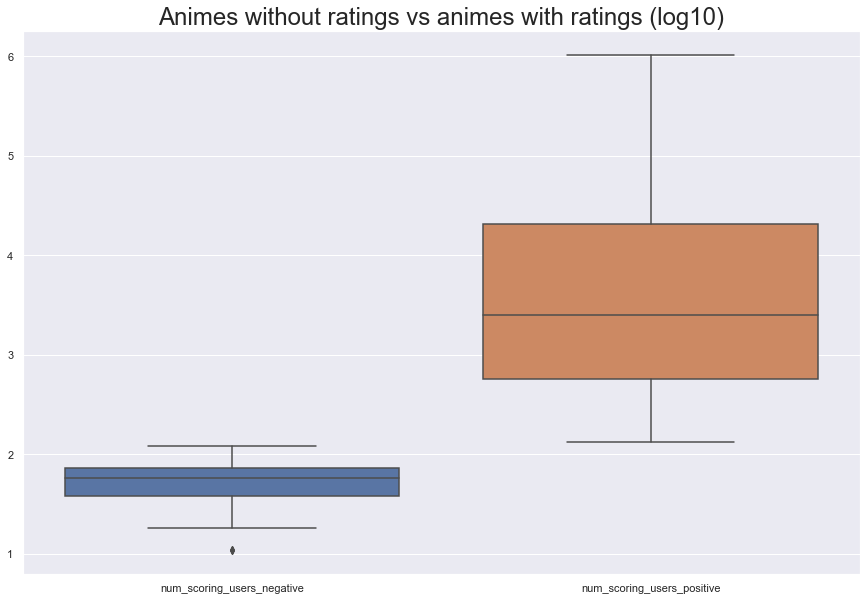

In [31]:
# Set the figure size
plt.figure(figsize=(15, 10))
plt.title('Animes without ratings vs animes with ratings (log10)', fontsize=24)

# plot a boxplot
sb.boxplot(data=num_scoring_users_df.loc[:, ['num_scoring_users_negative', 'num_scoring_users_positive']])
plt.show()

**Analysis:**
- It can be seen that animes without mean ratings are those that have low `num_scoring_users`, which means that there are not enough users watching and rating these animes for it to have a reliable `mean` rating

## 3.2 Drop rows with no `mean` rating (i.e., '-1')
- So that the overall mean rating would not be affected by those without ratings
- So that the EDA would not be skewed by the -1 number

In [32]:
print('Number of rows before:', len(anime_df))
anime_df_cleaner = anime_df.drop(anime_df[anime_df['mean'] == -1].index).reset_index(drop=True)
print('Number of rows after:', len(anime_df_cleaner))

print('Lowest mean rating', min(anime_df_cleaner['mean']))

anime_df_cleaner.head(2)

Number of rows before: 8777
Number of rows after: 8661
Lowest mean rating 3.46


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0,0.8987,0.1013
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,white,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,novel,1560,r,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na...",1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0,0.9479,0.0521


In [33]:
anime_df_cleaner.to_csv('dataset/anime_cleaned_2.csv')

## 3.3 `source`, `media_type`, `nsfw`, `rating`, `genre` vs `mean` rating

### Boxplot to plot category against mean

In [4]:
# function to plot category against mean
def cat_mean_boxplot(cat, mean='mean', data=anime_df_cleaner):
    plt.figure(figsize=(15, 15))
    sorted_index = (data.groupby(cat)[[mean]].median().sort_values(
        by=mean, ascending=False).index)
    sb.boxplot(y=cat, x=mean, data=data, orient='h', order=sorted_index).set(
        title=f"{cat[0].upper() + cat[1:]} vs Mean Rating")


## 3.3 (a) `source` vs `mean` rating

In [33]:
source_df = pd.DataFrame(anime_df_cleaner.groupby('source')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
source_df

,source,mean
0,web_novel,8.407143
1,manga,7.495636
2,light_novel,7.467327
3,novel,7.246776
4,web_manga,7.177500
5,mixed_media,6.977692
6,visual_novel,6.945909
7,other,6.821105
8,book,6.782121
9,4_koma_manga,6.778904


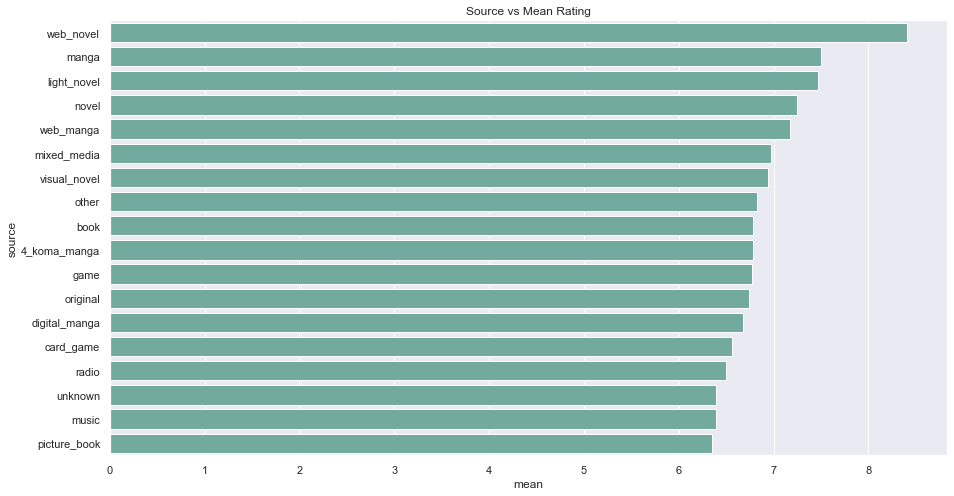

In [34]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="source", 
    data=source_df,
    ci=None, 
    color='#69b3a2'
).set(title="Source vs Mean Rating");

**Analysis:**
- `Web Novels` is a anime source that is very popular among viewers as these animes have a mean rating of 8.4, which is significantly more than that of other sources
- The top 5 anime sources are `web_novel`, `manga`, `light_novel`, `novel`, and `web_manga`
  - It seems like popular animes generally come from **novels & mangas**

**Boxplot:**

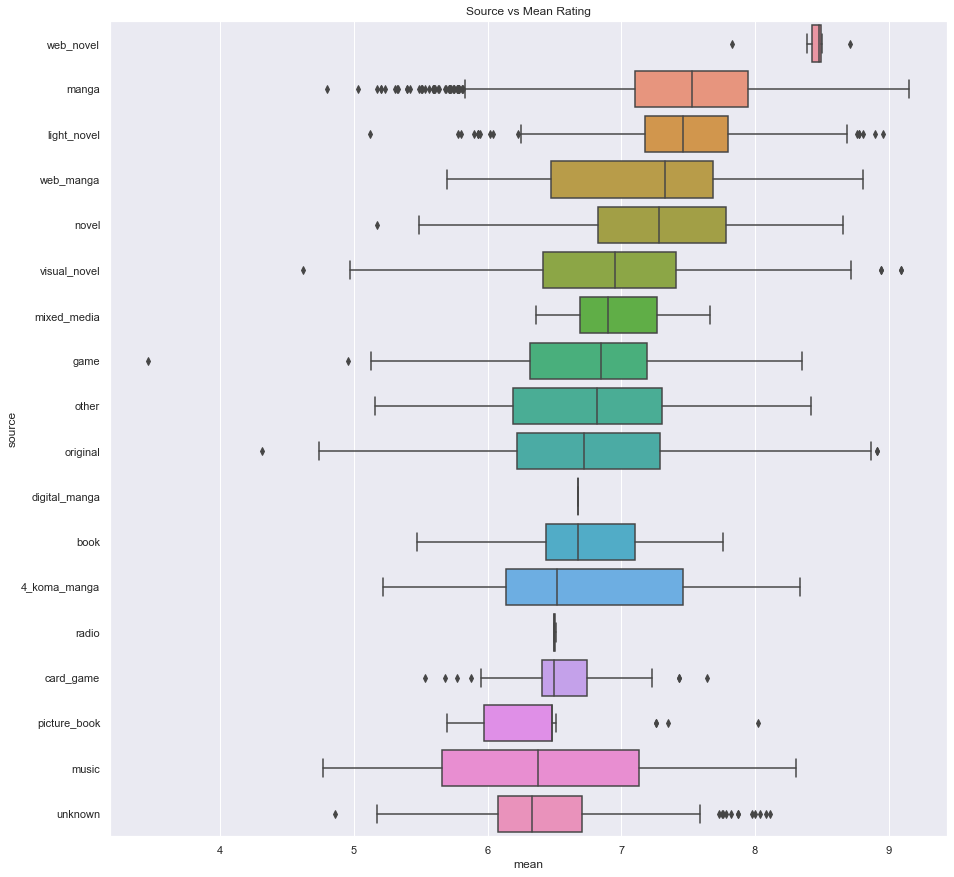

In [36]:
cat_mean_boxplot('source')


## 3.3 (b) `media_type` vs `mean` rating

In [41]:
media_type_df = pd.DataFrame(anime_df_cleaner.groupby('media_type')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
media_type_df

,media_type,mean
0,tv,7.213101
1,movie,7.181081
2,ova,6.996356
3,special,6.768369
4,ona,6.671516
5,music,6.348422


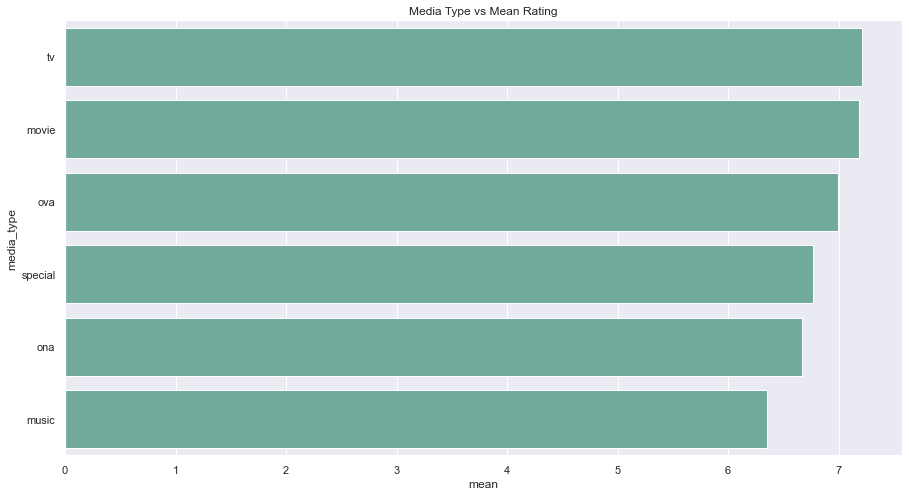

In [42]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="media_type", 
    data=media_type_df,
    ci=None, 
    color='#69b3a2'
).set(title="Media Type vs Mean Rating");

**Analysis:**
- All media types generally have similar mean rating.
- However, tv, movie, and ova have slightly higher mean rating, while music have the lowest mean rating.
  - This suggests that animes with **storylines** are higher rated compared to music-media-type animes

**Boxplot:**

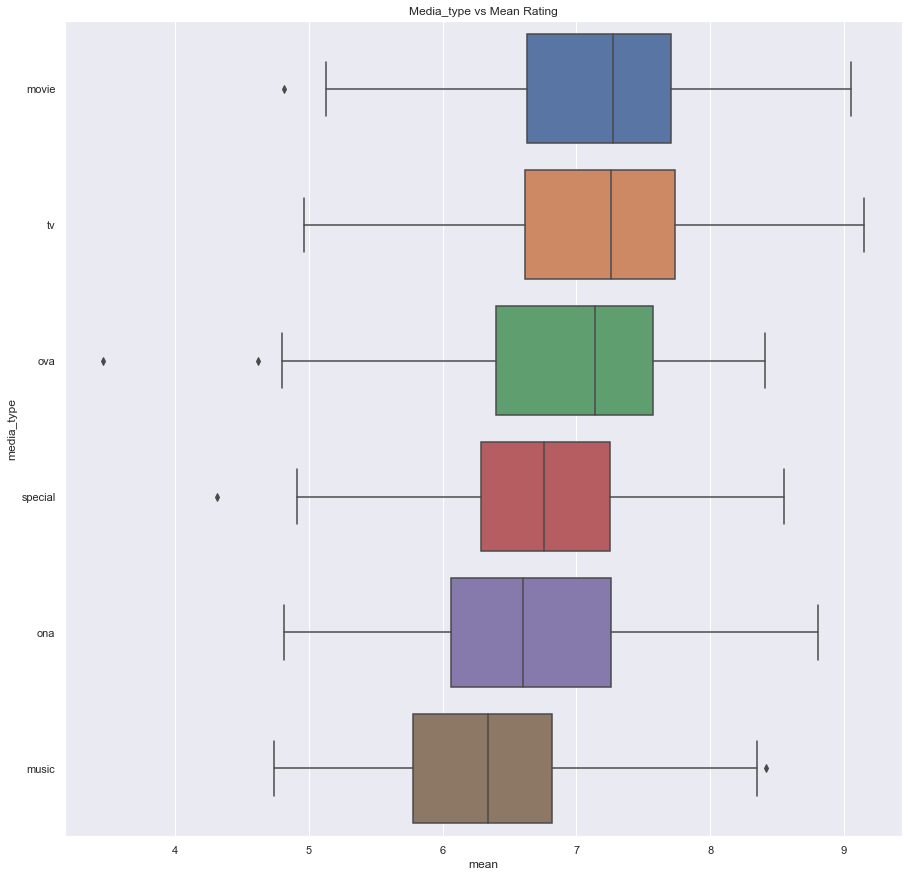

In [37]:
cat_mean_boxplot('media_type')


## 3.3 (c) `nsfw` vs `mean` rating

In [43]:
nsfw_df = pd.DataFrame(anime_df_cleaner.groupby('nsfw')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
nsfw_df

,nsfw,mean
0,white,7.056445


In [44]:
print(anime_df['nsfw'].unique())

['white']


**Analysis:**
- It seems like this dataset only included 'white' nsfw animes
- Thus, we **cannot compare** the different nsfw types with the mean rating

## 3.3 (d) `rating` vs `mean` rating

In [5]:
rating_df = pd.DataFrame(anime_df_cleaner.groupby('rating')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
rating_df

,rating,mean
0,r,7.558851
1,pg_13,7.276802
2,r+,7.053873
3,pg,6.791203
4,g,6.544091
5,no_rating,6.462069


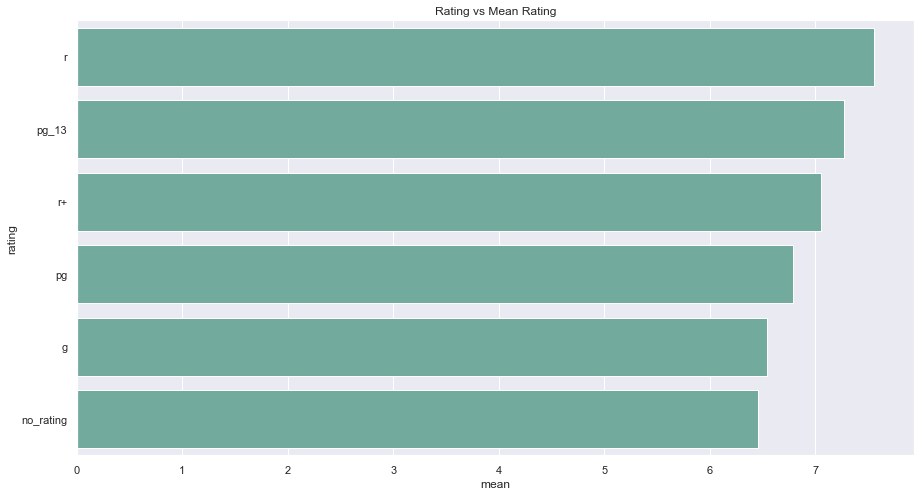

In [7]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="rating", 
    data=rating_df,
    ci=None, 
    color='#69b3a2'
).set(title="Rating vs Mean Rating");

**Analysis:**
- The rating `r` has the highest mean rating while `no_rating` and `g` have the lowest mean rating
- It seems like `r` rating has the highest mean rating because it connects to people on a more physcological and physical level compared to the other rating types

**Boxplot:**

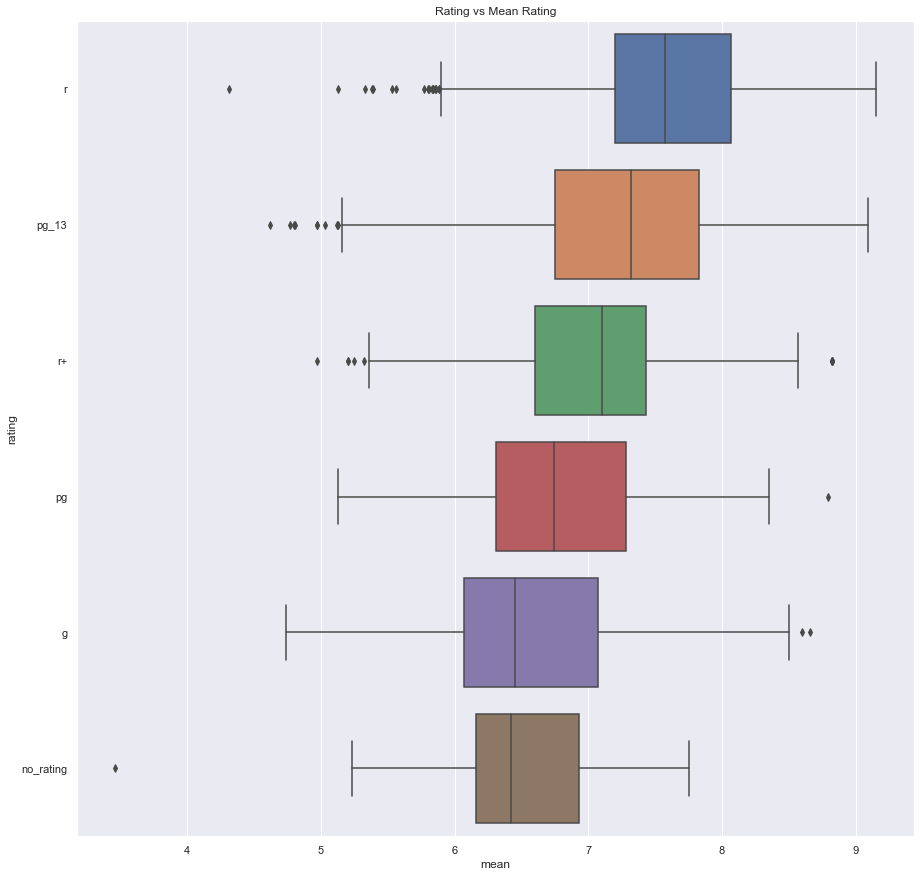

In [61]:
cat_mean_boxplot('rating')

## 3.3 (e) `genre` vs `mean` rating

In [56]:
# create a dictionary of genre mean ratings
from collections import defaultdict
genres_mean_ratings_dict = defaultdict(float)
genres_total_ratings_dict = defaultdict(float)
genres_mean_ratings_count_dict = defaultdict(int)

for row in range(len(anime_df_cleaner)):
    for genre in anime_df_cleaner['genres'][row]:
        genre_name = genre['name']
        genres_total_ratings_dict[genre_name] += anime_df_cleaner['mean'][row]
        genres_mean_ratings_count_dict[genre_name] += 1
for genre, rating in genres_total_ratings_dict.items():
    genres_mean_ratings_dict[genre] = round(rating / genres_mean_ratings_count_dict[genre], 2)


In [57]:
# convert to dataframe
genres_mean_ratings_df = pd.DataFrame(genres_mean_ratings_dict.items())

# rename columns
genres_mean_ratings_df.rename(columns={0: "genre", 1: "mean"}, inplace=True)

# sort df in descending order
genres_mean_ratings_df = genres_mean_ratings_df.sort_values(by='mean', ascending=False).reset_index(drop=True)

genres_mean_ratings_df.head()

,genre,mean
0,Award Winning,7.89
1,Suspense,7.72
2,Police,7.69
3,Super Power,7.69
4,Samurai,7.60


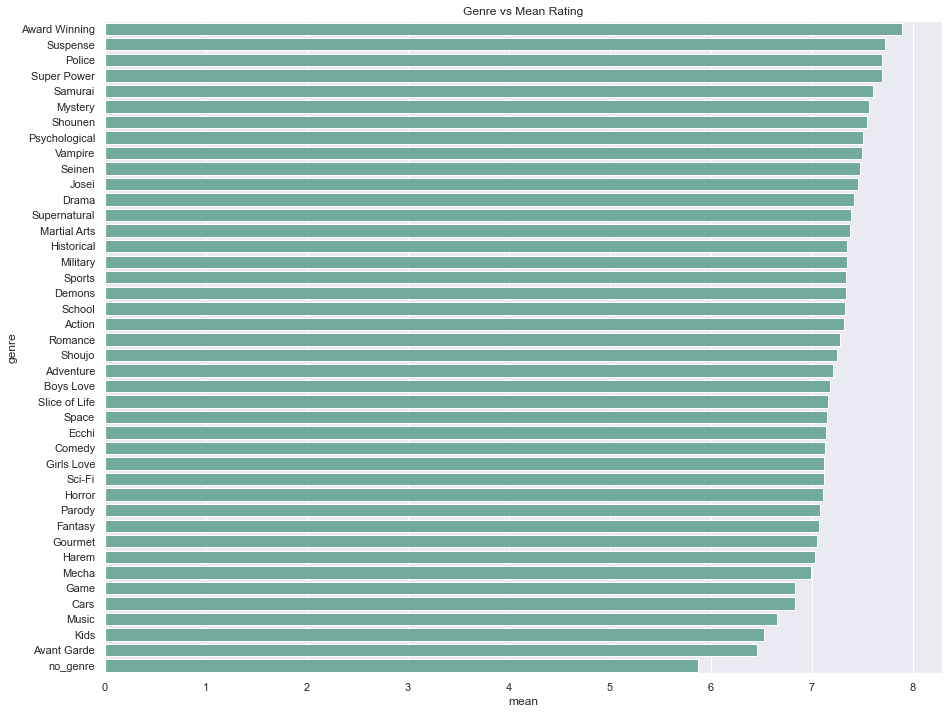

In [58]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Make a barplot
sb.barplot(
    x="mean", 
    y="genre", 
    data=genres_mean_ratings_df,
    ci=None, 
    color='#69b3a2'
).set(title="Genre vs Mean Rating");

**Analysis:**
- The top 5 genres with the highest mean rating include `Award Winning`, `Suspense`, `Police`, `Super Power`, and `Samurai`
- The bottom 5 genres with the lowest mean rating include `no_genre`, `Avant Garde`, `Kids`, `Music`, and `Cars`


<!-- - It is no surprise that `Comedy` has the forth lowest mean rating even though it is among the top 5 most commonly seen genres as it support its decreasing trend in animes with 'Comedy' genre produced yearly -->
- `Kids` has the 3rd lowest mean rating which supports its decreasing trend in animes with 'Kids' genre produced yearly


- `no_genre` has the lowest mean rating because these animes are so bad that no one rated them

---
**From previous analysis:**
- The top 5 genres commonly seen are Comedy, Action, Fantasy, Adventure, and Shounen
- **Decreasing Trend:**
  - Shounen, Comedy, Kids, Mecha, Sci-Fi, Adventure
- **Increasing Trend:**
  - Slice of Life, Music

**Boxplot:**

In [38]:
genre_mean_df = pd.DataFrame()
count = 0
for row in range(len(anime_df_cleaner)):
    for genre in anime_df_cleaner['genres'][row]:
        genre_mean_df = genre_mean_df.append(
            pd.DataFrame({
                'genre': genre['name'],
                'mean_rating': anime_df_cleaner['mean'][row]
            }, index=[count]))
        count += 1


In [39]:
genre_mean_df.head()

,genre,mean_rating
0,Action,7.71
1,Adventure,7.71
2,Drama,7.71
3,Mecha,7.71
4,Military,7.71


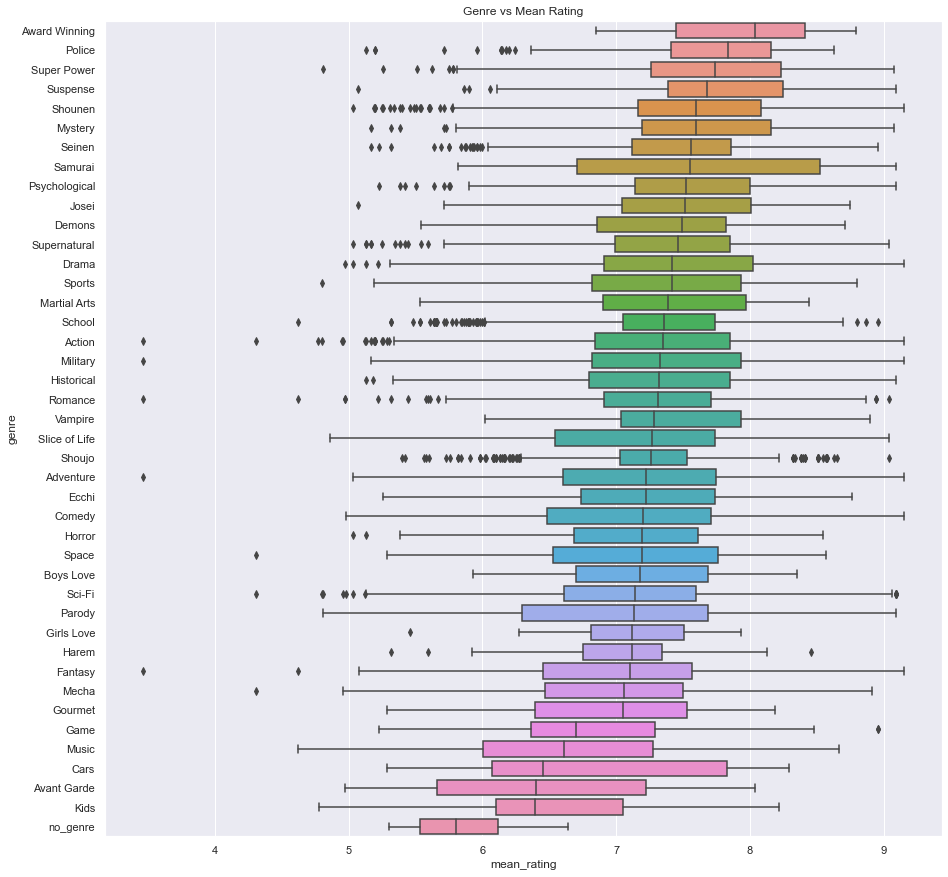

In [40]:
cat_mean_boxplot(cat='genre', mean='mean_rating', data=genre_mean_df)

## 3.3 (f) `studios` vs `mean` rating

In [87]:
# create a dictionary of studios mean ratings
from collections import defaultdict
studios_mean_ratings_dict = defaultdict(float)
studios_total_ratings_dict = defaultdict(float)
studios_mean_ratings_count_dict = defaultdict(int)

for row in range(len(anime_df_cleaner)):
    for studio in anime_df_cleaner['studios'][row]:
        studio_name = studio['name']
        studios_total_ratings_dict[studio_name] += anime_df_cleaner['mean'][row]
        studios_mean_ratings_count_dict[studio_name] += 1

for studio, rating in studios_total_ratings_dict.items():
    studios_mean_ratings_dict[studio] = round(rating / studios_mean_ratings_count_dict[studio], 2)


In [90]:
# convert to dataframe
studios_mean_ratings_df = pd.DataFrame(studios_mean_ratings_dict.items())

# rename columns
studios_mean_ratings_df.rename(columns={0: "studio", 1: "mean"}, inplace=True)

# sort df in descending order
studios_mean_ratings_df = studios_mean_ratings_df.sort_values(by='mean', ascending=False).reset_index(drop=True)

studios_mean_ratings_df.head()

,studio,mean
0,Studio Bind,8.56
1,Studio Signpost,8.38
2,Egg Firm,8.34
3,China Literature Limited,8.25
4,CLAP,8.18


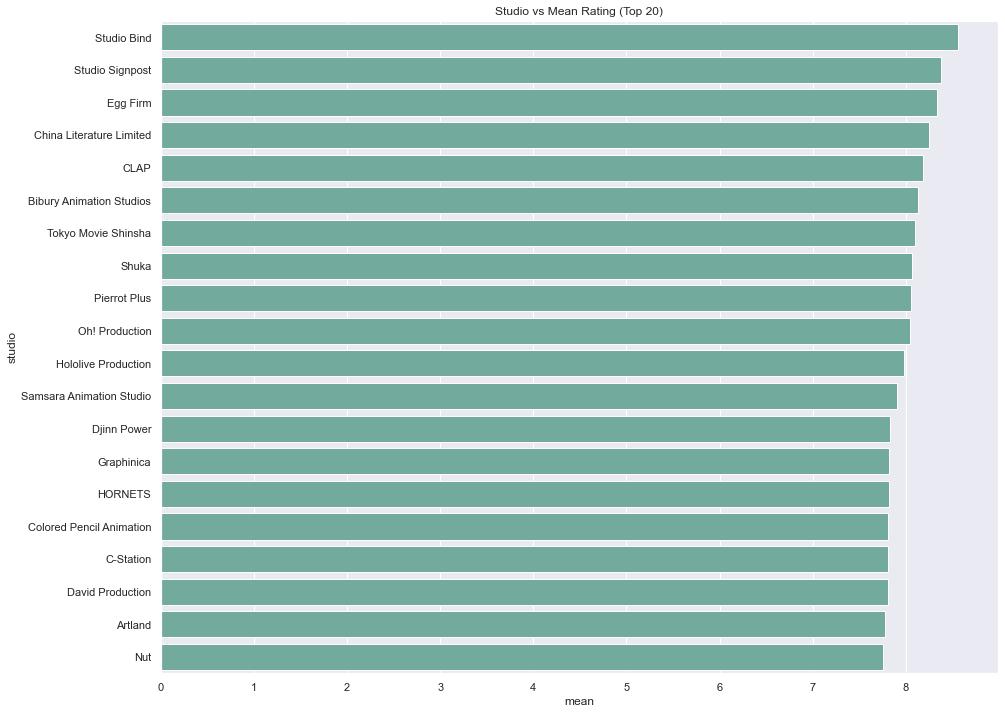

In [95]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Make a barplot
sb.barplot(
    x="mean", 
    y="studio", 
    data=studios_mean_ratings_df.head(20),
    ci=None, 
    color='#69b3a2'
).set(title="Studio vs Mean Rating (Top 20)");

**Analysis:**
- The studio that produced the highest mean rating is `Studio Bind`, followed by `Studio Signpost`, `Egg Firm`, `China Literature Limited`, and `CLAP`
- It is **surprising** that the top 5 most common studios in from 2000 to 2021 are not in the top 20 studios that produce the highest mean rating
  - Perhaps, quanlity is better than quantity

**From previous Analysis:**
- `Toei Animation` is the most common studio in this dataset, followed by `Sunrise`, `TMS Entertainment`, `Madhouse`, and `OLM`

# 4. Relationship between `mean`, `rank`, `popularity`, `positive_viewership_fraction`, and `negative_viewership_fraction`

In [48]:
mean_rating = anime_df_cleaner['mean']
rank = anime_df_cleaner['rank']
popularity = anime_df_cleaner['popularity']
positive_viewership_fraction = anime_df_cleaner['positive_viewership_fraction']
negative_viewership_fraction = anime_df_cleaner['negative_viewership_fraction']

# combine into one df
relationship_df = pd.DataFrame(mean_rating)

relationship_df['rank'] = rank
relationship_df['popularity'] = popularity
relationship_df['positive_viewership_fraction'] = positive_viewership_fraction
relationship_df['negative_viewership_fraction'] = negative_viewership_fraction

relationship_df.head()

,mean,rank,popularity,positive_viewership_fraction,negative_viewership_fraction
0,7.71,1049,2892,0.8987,0.1013
1,8.07,472,4347,0.9479,0.0521
2,7.74,976,2553,0.7589,0.2411
3,8.63,66,26,0.7816,0.2184
4,7.77,924,2135,0.9915,0.0085


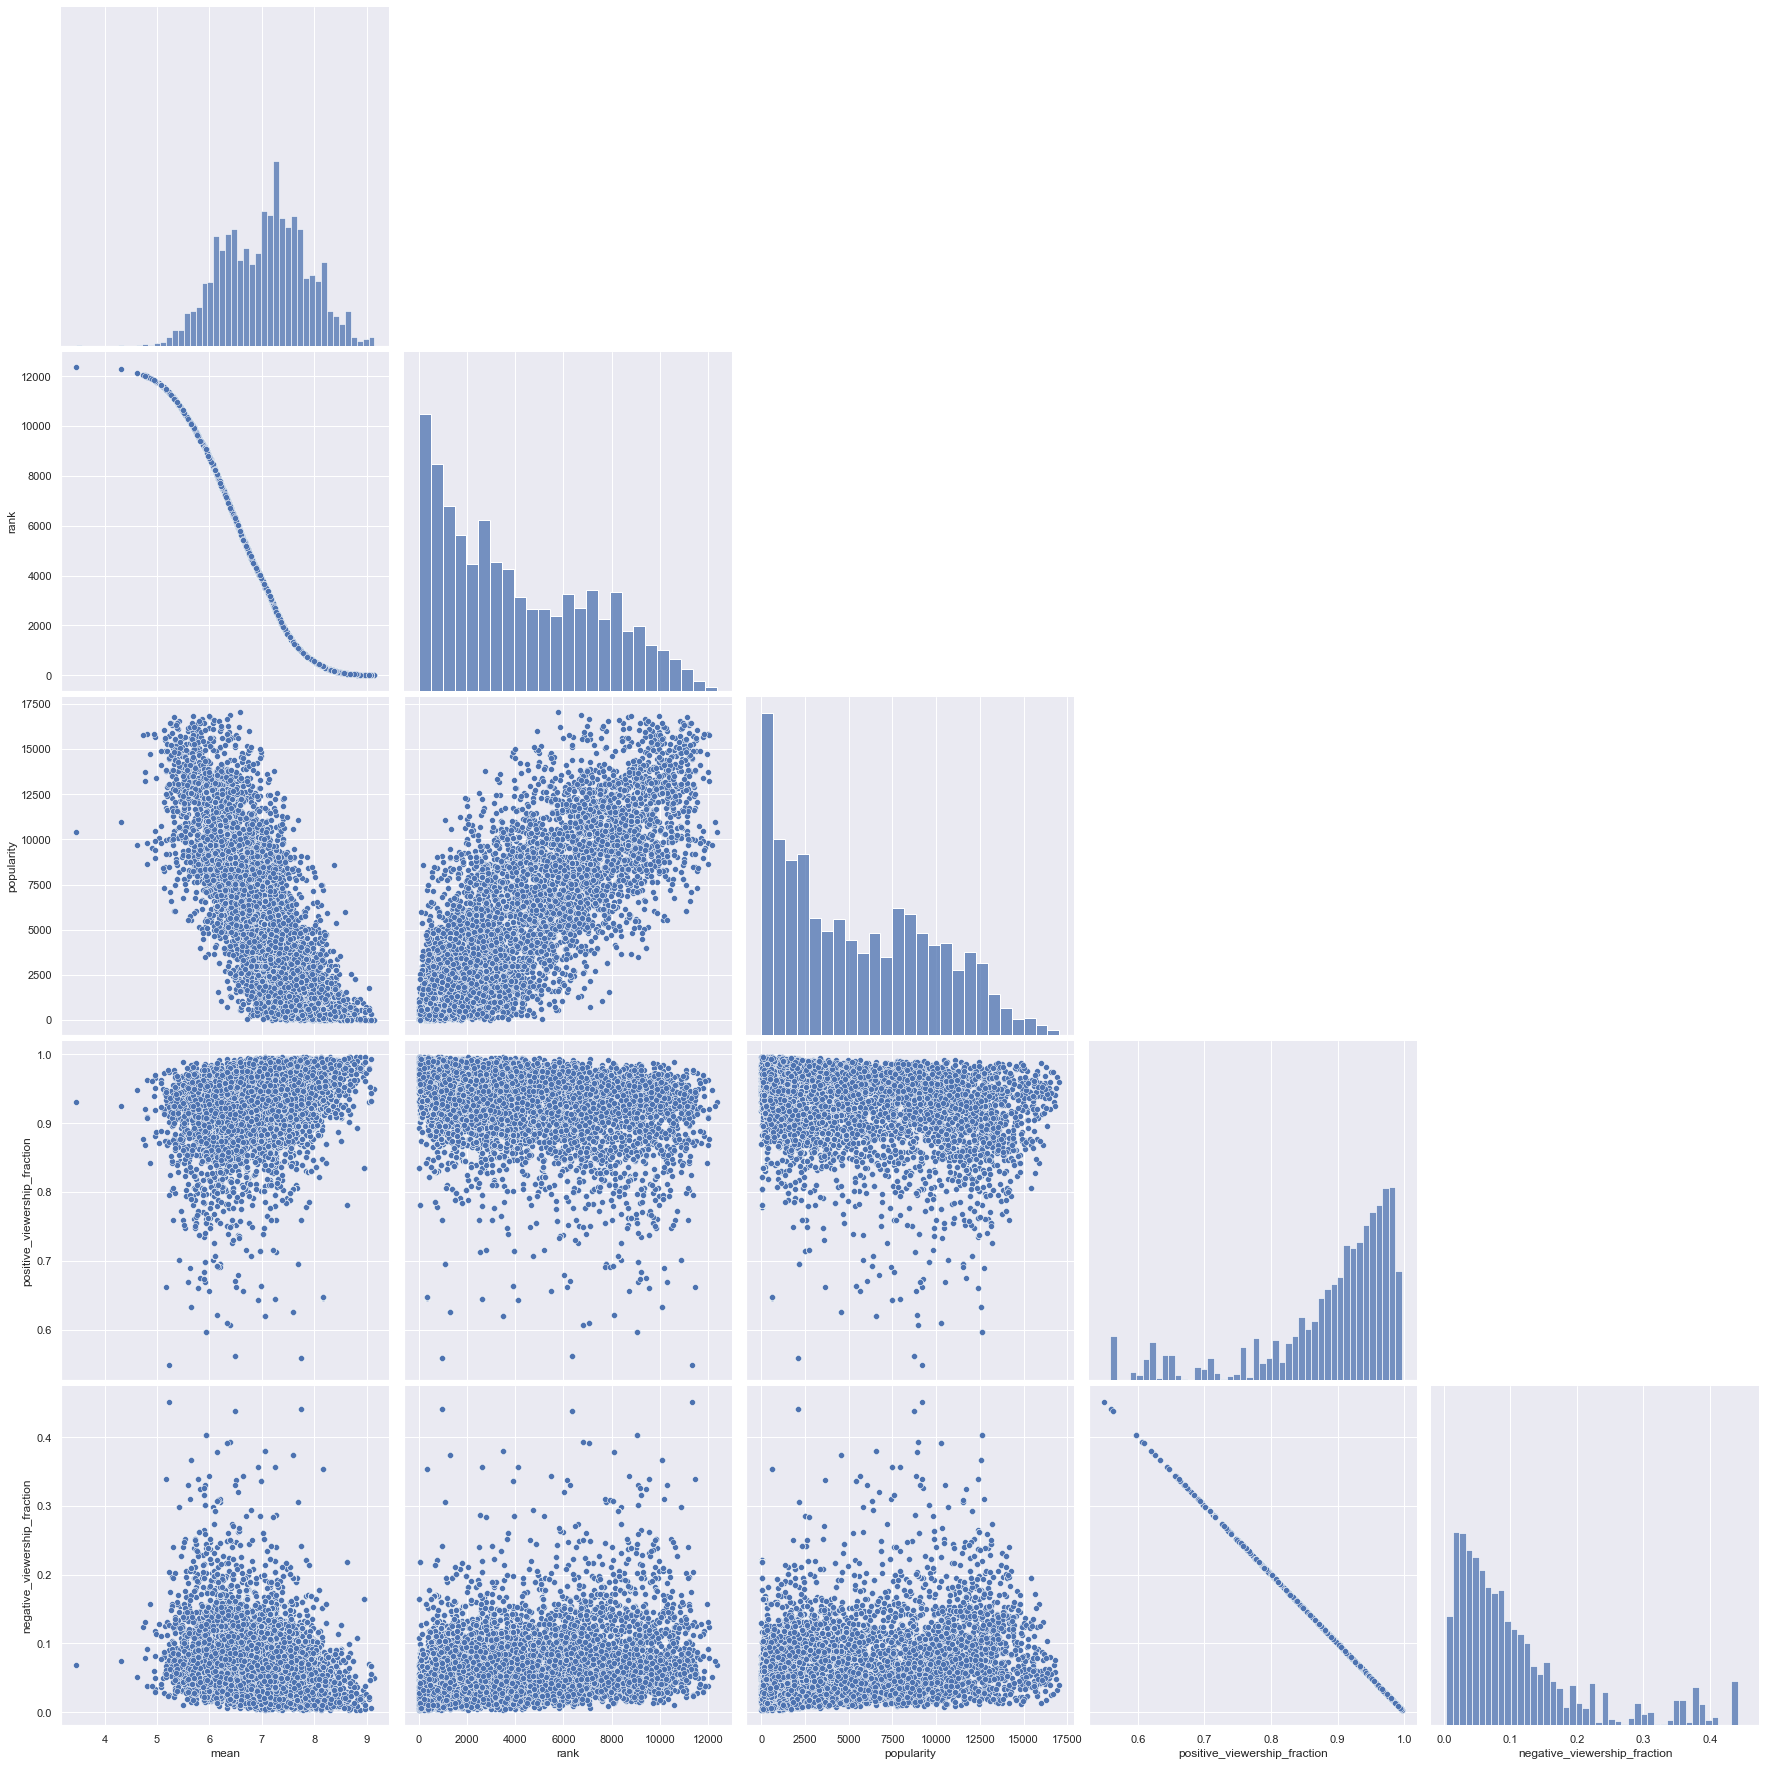

In [49]:
sb.pairplot(
    relationship_df, 
    kind="scatter", 
    height=5, 
    corner=True)

plt.show()

In [50]:
relationship_df.corr()

,mean,rank,popularity,positive_viewership_fraction,negative_viewership_fraction
mean,1.000000,-0.975104,-0.804107,0.102066,-0.102066
rank,-0.975104,1.000000,0.814610,-0.108684,0.108684
popularity,-0.804107,0.814610,1.000000,-0.139345,0.139345
positive_viewership_fraction,0.102066,-0.108684,-0.139345,1.000000,-1.000000
negative_viewership_fraction,-0.102066,0.108684,0.139345,-1.000000,1.000000


C:\Users\tohji\AppData\Local\Temp/ipykernel_15664/2296525324.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(relationship_df.corr(), dtype=np.bool))


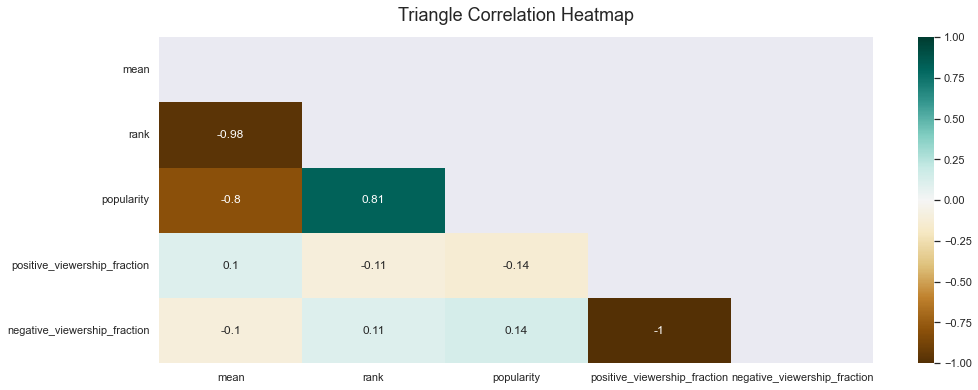

In [51]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(relationship_df.corr(), dtype=np.bool))
heatmap = sb.heatmap(relationship_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


Correlation Heatmap Reference: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

**Analysis:**
- `mean` increases while `rank` decreases --> As rank improves, mean rating increases
- `mean` increases while `popularity` decreases --> As popularity improves, mean rating increases
- `rank` increases with `popularity` --> As rank worsens, popularity also worsens
- It seems like there isn't much correction between `mean`, `rank`, and `popularity` with `negative_viewership_fraction` and `positive_viewership_fraction`

## 5) Overview Trend of `num_episodes` and `average_episode_duration`

### 5a) Number of episodes over time

In [179]:
start_date_num_episodes_df = pd.DataFrame(
    anime_df_cleaner.groupby('start_date')['num_episodes'].mean())
start_date_num_episodes_df.describe()

,num_episodes
count,3202.000000
mean,13.731692
std,53.628257
min,0.000000
25%,1.000000
50%,3.450000
75%,13.000000
max,1818.000000


We need to remove dates with `0` episodes

In [180]:
cleaned_start_date_num_episodes_df = start_date_num_episodes_df[
    start_date_num_episodes_df['num_episodes'] != 0]
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.sort_values(by='start_date')
cleaned_start_date_num_episodes_df

,num_episodes
start_date,
1979-04-02,1787.000000
1993-12-13,726.000000
1994-10-03,1818.000000
1996-06-16,373.000000
1997-04-01,276.000000
...,...
2021-12-16,10.000000
2021-12-21,1.000000
2021-12-24,1.333333


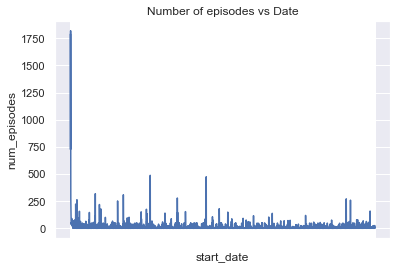

In [183]:
ax = sb.lineplot(x='start_date',
                 y='num_episodes',
                 data=cleaned_start_date_num_episodes_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Date")
plt.show()

Presence of outliers at the very start of dataset makes it hard to determine the trend
Therefore, we need to remove outliers at the start

In [184]:
q3 = cleaned_start_date_num_episodes_df['num_episodes'].quantile(0.75)
q1 = cleaned_start_date_num_episodes_df['num_episodes'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.loc[
    (cleaned_start_date_num_episodes_df['num_episodes'] >= lower_bound)
    & (cleaned_start_date_num_episodes_df['num_episodes'] <= upper_bound)]
print(f"Range: [{lower_bound}, {upper_bound}]")
cleaned_start_date_num_episodes_df

Range: [-17.0, 31.0]


,num_episodes
start_date,
1999-10,25.000000
1999-10-05,25.000000
1999-10-06,26.000000
1999-10-08,24.500000
1999-10-13,26.000000
...,...
2021-12-16,10.000000
2021-12-21,1.000000
2021-12-24,1.333333


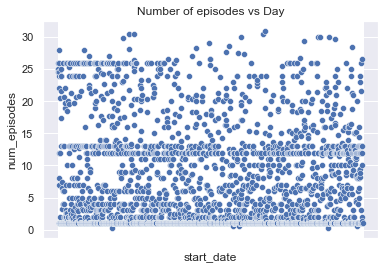

In [185]:
ax = sb.scatterplot(x='start_date',
                 y='num_episodes',
                 data=cleaned_start_date_num_episodes_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Day")
plt.show()

Unable to see the trend due to too many changes within different dates
Need to take the mean of the month instead of day

#### 5ai) Group by month

In [186]:
# rename start_date from YYYY-MM-DD to YYYY-MM
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.rename(lambda date: '-'.join(date.split('-')[:2]))
month_start_date_num_episodes_df = pd.DataFrame(cleaned_start_date_num_episodes_df.groupby('start_date')['num_episodes'].mean())
month_start_date_num_episodes_df

,num_episodes
start_date,
1999-10,24.642857
1999-12,28.000000
2000-01,10.766667
2000-02,7.500000
2000-03,1.200000
...,...
2021-08,5.611111
2021-09,6.125000
2021-10,10.344583


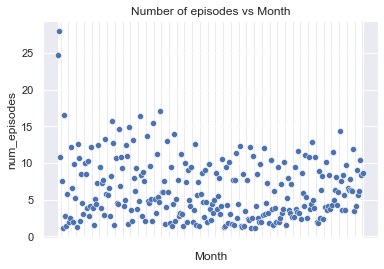

In [187]:
ax = sb.scatterplot(x='start_date',
                    y='num_episodes',
                    data=month_start_date_num_episodes_df)
ax.set(xlabel="Month")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Month")
plt.show()

Still cannot see a visible trend
Now try grouping by year

#### 5aii) Group by year

In [188]:
# rename start_date from YYYY-MM-DD to YYYY
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.rename(
    lambda date: date.split('-')[0])
year_start_date_num_episodes_df = pd.DataFrame(
    cleaned_start_date_num_episodes_df.groupby('start_date')
    ['num_episodes'].mean())
year_start_date_num_episodes_df.head()

,num_episodes
start_date,
1999,25.062500
2000,6.999260
2001,7.224363
2002,7.035300
2003,7.434077


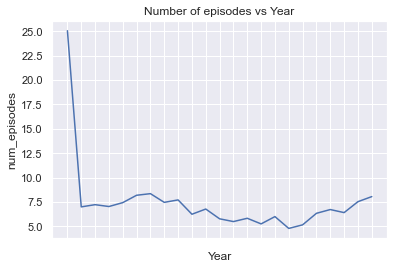

In [189]:
ax = sb.lineplot(x='start_date',
                    y='num_episodes',
                    data=year_start_date_num_episodes_df)
ax.set(xlabel="Year")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Year")
plt.show()

#### Analysis

Number of episodes over the years have stayed relatively the same

## 5b) Trend of `average_episode_duration` over time

In [193]:
ep_duration_df = pd.DataFrame(
    anime_df_cleaner.groupby('start_date')['average_episode_duration'].mean())
ep_duration_df.describe()
ep_duration_df.sort_values(by='average_episode_duration')

,average_episode_duration
start_date,
2021-10-05,0.0
2004-05-29,0.0
2013-08-03,0.0
2002-06-01,0.0
2016-02-14,15.0
...,...
2018-05-26,8400.0
2012-07-14,8990.0
2013-02-09,9000.0


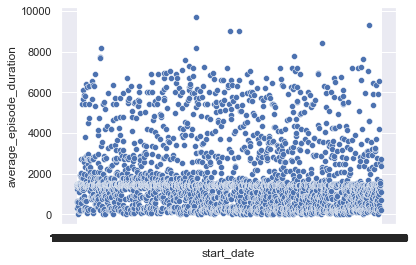

In [198]:
sb.scatterplot(x='start_date', y='average_episode_duration' , data=ep_duration_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Average episode duartion over time")
plt.show()

---

# 6. `start_season_season` EDA
## 6.1 `start_season_season` vs `mean`



In [8]:
start_season_season_df = pd.DataFrame(anime_df_cleaner.groupby('start_season_season')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
start_season_season_df

,start_season_season,mean
0,fall,7.094447
1,winter,7.057072
2,spring,7.054733
3,summer,6.995623


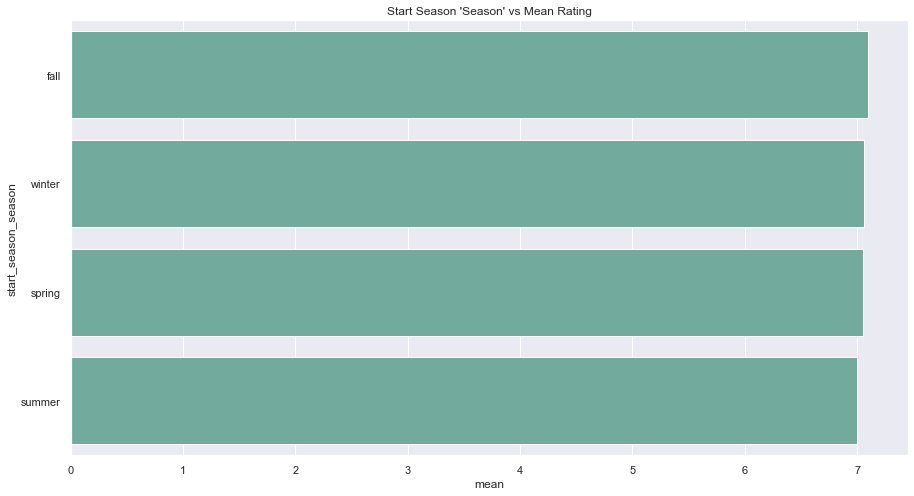

In [10]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="start_season_season", 
    data=start_season_season_df,
    ci=None, 
    color='#69b3a2'
).set(title="Start Season 'Season' vs Mean Rating");

**Boxplot:**

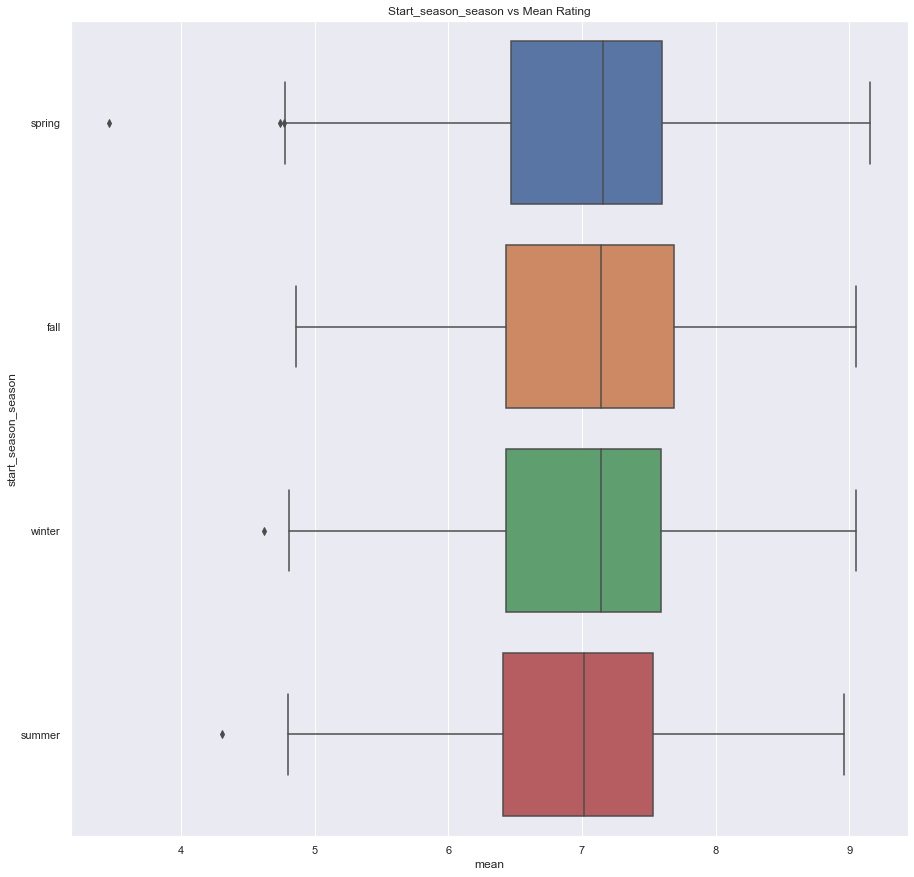

In [11]:
cat_mean_boxplot('start_season_season')

**Analysis:**
- `mean` rating are relatively the same for all 4 seasons, with similar distribution of `mean` rating for each season
- Thus, there is **no single season** that will generally produce a greater `mean` rating

## 6.2 `start_season_season` vs `positive_viewership_fraction`


[Text(0.5, 1.0, "Start Season 'Season' vs Positive Viewership Fraction")]

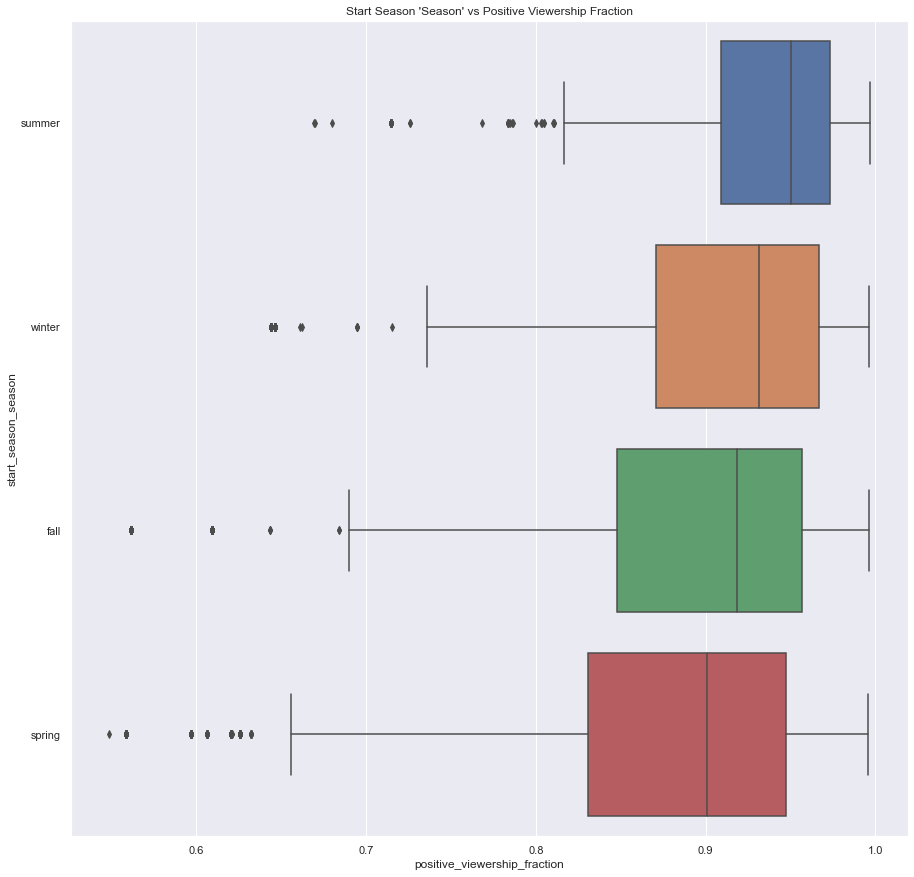

In [20]:
plt.figure(figsize=(15, 15))

sorted_index = (anime_df_cleaner.groupby('start_season_season')[['positive_viewership_fraction']].median().sort_values(
    by='positive_viewership_fraction', ascending=False).index)
sb.boxplot(y='start_season_season', x='positive_viewership_fraction', data=anime_df_cleaner, orient='h', order=sorted_index).set(
    title="Start Season 'Season' vs Positive Viewership Fraction")


**Analysis:**
- `summer` has the highest positive_viewership_fraction, followed by `winter`, `fall`, and `spring`
  - Thus, it seems like people are more likely to watch animes during the `summer` and `winter` when it is too hot or cold to engage in outdoor activities, so people might be staying indoors and watch more animes
  
## 6.3 `start_season_season` vs `genres`
- Top 5 genres from each season

In [50]:
season_genres_dict = {
    'spring': defaultdict(int),
    'summer': defaultdict(int),
    'fall': defaultdict(int),
    'winter': defaultdict(int)
}

# genres count for each season
for anime in range(len(anime_df)):
    season = anime_df['start_season_season'][anime]
    for genre in anime_df['genres'][anime]:
        # skip animes with no genres
        if genre['id'] == -1:
            continue
        
        genre_name = genre['name']
        season_genres_dict[season][genre_name] += 1


In [59]:
# function to plot top 3 genres for each season
def top_season_genres(season_genres_dict, season):
    return pd.DataFrame(season_genres_dict[season].items()).rename(columns={0: 'genre', 1: 'count'}).sort_values(by='count', ascending=False).reset_index(drop=True)


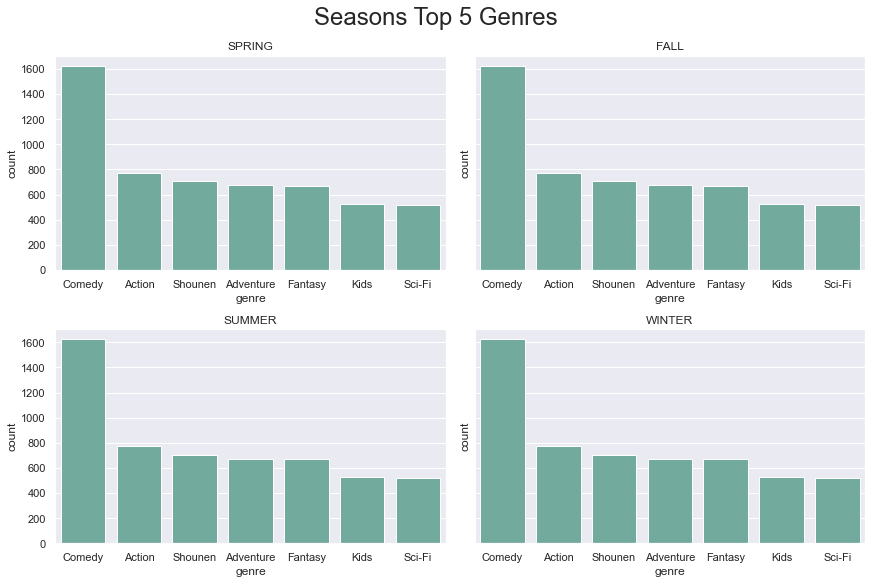

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True, constrained_layout=True)
fig.suptitle('Seasons Top 5 Genres', fontsize=24)

x_index = 0
y_index = 0

for season in ['spring', 'summer', 'fall', 'winter']:
    # Make a barplot
    sb.barplot(
        ax=axs[x_index, y_index],
        x="genre", 
        y="count", 
        data=top_season_genres(season_genres_dict, 'spring').head(7),
        ci=None, 
        color='#69b3a2'
    ).set(title=season.upper());
    
    # subplot ordering
    x_index += 1
    if x_index >= 2:
        x_index -= 2
        y_index += 1


**Analysis:**
- The top 5 genres for all seasons are the same
- As expected, `Comedy` is the top genre for all season as it was the top for years 1999 to 2021
- There is no genre that is produced more in a particular season

## TODO



---

- catplot
- scattor plots

---
Hua:
- For part 3.3, do boxplot with different colors for different categories
- Add to part 3.3 --> rating (pg_13, etc) --> do catplot with different color for different ratings --> compare with mean_rating
- Overview Trend

---
- num_episodes
- average_episode_duration
- start_season_season


---

Maybe??
- Create new csv for genres, and studios after splitting json, with anime id as the foreign key
  - genres time series
  - anime watch count time series
  - studios associated with anime


In [52]:
anime_df.head()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0,0.8987,0.1013
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,white,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,novel,1560,r,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na...",1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0,0.9479,0.0521
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,white,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1787,manga,660,pg,"[{'id': 247, 'name': 'Shin-Ei Animation'}]",1979.0,spring,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0,0.7589,0.2411
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,white,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,manga,1440,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]",1999.0,fall,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0,0.7816,0.2184
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1,original,2460,pg,"[{'id': 18, 'name': 'Toei Animation'}]",2000.0,winter,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0,0.9915,0.0085
